#

In [1]:
# import ROOT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# from root_numpy import root2array, array2tree, tree2array, array2root
import uproot
import h5py

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
extra = np.arange(4096,4480)

file = uproot.open("Run9goodDataQ_dualgate.root")["tree"]
print(file)
pmtall = file.array("PMTALL")
pmtall = np.delete(pmtall, extra, axis=1)
pedestal = file.array("Pedestal")

pedestal = pedestal[:,0]

print(len(pedestal))
for i in range(len(pedestal)):
    pmtall[i] = pedestal[i] - pmtall[i]

flipped = np.flip(pmtall, axis=1)

i_pmtall = np.copy(pmtall)
i_flipped = np.copy(flipped)

for i in range(len(pedestal)):
#     i_pmtall[i] = np.flip(pmtall[i],axis=0)
#     i_flipped[i] = np.flip(flipped[i],axis=0)
    i_pmtall[i] = np.random.permutation(i_pmtall[i])
    i_flipped[i] = np.random.permutation(i_flipped[i])


<TTree b'tree' at 0x0001435e4278>
65675


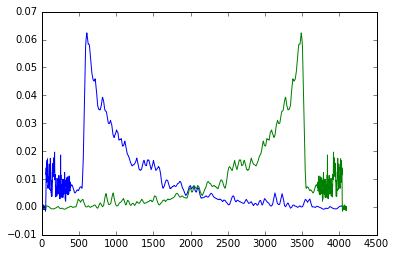

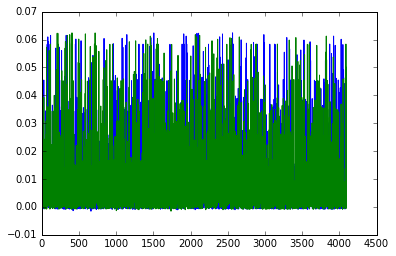

In [4]:
plt.figure()
plt.plot(pmtall[8])
plt.plot(flipped[8])
plt.show()

plt.figure()
plt.plot(i_pmtall[8])
plt.plot(i_flipped[8])
plt.show()

del file, pedestal

In [9]:
from torch.autograd import Variable
from torch.utils.data import DataLoader

# print(pmtall, pmtall.ctypes)
print(flipped.shape, flipped.ctypes)
print(i_pmtall.shape)
print(i_flipped.shape)
# test = np.concatenate((pmtall,flipped),axis=0)
print(test.shape, test.ctypes)

data_loader = DataLoader(dataset=test,
                         batch_size=100,
                         shuffle=True,
                         num_workers=3)
for i,j in enumerate(data_loader):
    print(i)
    print(j.shape, j)
    if i ==10:
        break

(6698, 4096) <numpy.core._internal._ctypes object at 0x7f1785595ac8>
(6698, 4096)
(6698, 4096)
(13396, 4096) <numpy.core._internal._ctypes object at 0x7f17855954e0>
0
torch.Size([100, 4096]) tensor([[  -0.3076,   -0.3076,   -0.3076,  ...,   -0.0791,   -0.2002,
           -0.3057],
        [   1.1445,    1.2188,    1.2246,  ...,   -4.6191,   -2.6191,
           -2.6191],
        [  -2.1172,   -2.0449,   -1.9707,  ...,    0.1260,    0.1260,
           -0.8740],
        ...,
        [  -2.2051,    1.7949,   -0.2051,  ...,    2.0332,    2.0156,
            2.0215],
        [  -2.4775,   -2.2900,   -2.0928,  ...,    2.2998,   -0.7002,
           -0.7002],
        [   0.7471,   -5.2529,   -7.2529,  ...,   -2.3457,   -2.3535,
           -2.3730]])
1
torch.Size([100, 4096]) tensor([[   2.3076,   -3.6924,   -1.6924,  ...,   -1.1484,   -1.3105,
           -1.4492],
        [  -0.8203,   -5.8203,    2.1797,  ...,    0.5527,    0.5234,
            0.5078],
        [  -1.6270,   -1.6699,   -1.7129,

In [4]:
rfile = ROOT.TFile.Open("Run9goodDataQ_dualgate.root")
tree = rfile.Get("tree")
print([b.GetName() for b in tree.GetListOfBranches()])

['Header', 'TimingDiff', 'DataQuality', 'Ratio', 'Ratio4us', 'RatioR', 'PMTALL', 'Pedestal', 'Position_wm', 'CrystalN', 'PSDPara', 'Energy', 'TriggerCounter', 'EnergyScaleFactor', 'PSDDoubleP']


In [5]:
# tree.SetBranchStatus("PMTALL",0)

# new_file = ROOT.TFile.Open("4Run9good.root","recreate")
# newtree = tree.CloneTree()
# del tree

# newtree.Branch("PMTALL1", pmtall, "PMTALL1[4096]/F")
# newtree.Branch("PMTALL2", flipped, "PMTALL2[4096]/F")
# newtree.Branch("PMTALL3", i_pmtall, "PMTALL3[4096]/F")
# newtree.Branch("PMTALL3", i_flipped, "PMTALL4[4096]/F")

# for i in range(65675):
#     t.Fill()

# newtree.Write()
# print([b.GetName() for b in newtree.GetListOfBranches()])  
print(pmtall)

[[-2.1884766   0.81152344 -1.1884766  ...  4.399414    4.385742
   4.321289  ]
 [-2.006836   -5.006836   -4.006836   ... 13.282227   12.569336
  11.858398  ]
 [ 1.6298828  -2.3701172  -1.3701172  ... -1.6357422  -1.6923828
  -1.7255859 ]
 ...
 [ 1.2919922  -2.7080078  -2.7080078  ... -2.8691406  -2.8183594
  -2.7460938 ]
 [-5.4716797  -4.4716797  -7.4716797  ... -0.9794922  -0.88378906
  -0.7998047 ]
 [ 4.0371094  -5.9628906   3.0371094  ... -1.3955078  -1.4736328
  -1.5205078 ]]


In [3]:
pmtall = normalize(pmtall,axis=1,norm="l2")
flipped = normalize(flipped,axis=1,norm="l2")
i_pmtall = normalize(i_pmtall,axis=1,norm="l2")
i_flipped = normalize(i_flipped,axis=1,norm="l2")


In [5]:
print(pmtall.shape, flipped.shape, i_pmtall.shape, i_flipped.shape)
train = np.concatenate((pmtall[:30000],flipped[:30000],i_pmtall[:30000],i_flipped[:30000]), axis=0)
print(train.shape)

(65675, 4096) (65675, 4096) (65675, 4096) (65675, 4096)
(120000, 4096)


In [6]:
del pmtall,flipped,i_pmtall,i_flipped
# train = normalize(train,axis=1,norm="l2")

In [ ]:
print(root2array("Run9goodDataQ_dualgate.root"))

In [7]:
# print(train.shape)
# print(train.reshape(65675,16384))
# h5f = h5py.File("train.h5", "w")
# h5f.create_dataset("pmtall", data=train)
# h5f.close()
np.save("train", train)


In [7]:
print(train.shape)
print(train)

(131350, 4096)
[[-3.17386526e-04  1.17692194e-04 -1.72360291e-04 ...  6.38030469e-04
   6.36047742e-04  6.26700348e-04]
 [-3.37813515e-04 -8.42807756e-04 -6.74476323e-04 ...  2.23581586e-03
   2.11581402e-03  1.99614093e-03]
 [ 1.99310845e-04 -2.89830699e-04 -1.67545310e-04 ... -2.00027353e-04
  -2.06953686e-04 -2.11013932e-04]
 ...
 [-4.44936013e-04 -4.56644833e-04 -4.64872690e-04 ... -4.38765128e-04
  -4.38765128e-04  2.09335107e-04]
 [-8.83408502e-05 -9.76171796e-05 -1.08187880e-04 ... -8.25269672e-04
  -4.93910571e-04 -6.04363624e-04]
 [-1.73143999e-04 -1.67806225e-04 -1.58909941e-04 ...  3.45843175e-04
  -6.79009128e-04  4.59715666e-04]]
